# Model 3

In [63]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [64]:
import pandas as pd
import nltk
import pyLDAvis.gensim
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import re
import gensim
import gensim.corpora as corpora
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda
import json
import pandas as pd
import numpy as np
import re
import sys
import nltk
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk import ngrams
from sklearn.decomposition import LatentDirichletAllocation
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from stopwords_list import stop_words_list
from wn_affect import wn_affect 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shwethailango/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shwethailango/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Read Data

In [65]:
df2=pd.read_csv('output.csv')
df=df2.drop(columns=['Liked'], axis=1)

In [66]:
df

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


### Text Cleaning

In [67]:
df['remove_lower_punct'] = df['Review'].str.lower().str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()

display(df.head(10))

,Review,remove_lower_punct
0,Wow... Loved this place.,wow loved this place
1,Crust is not good.,crust is not good
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...
8,The fries were great too.,the fries were great too
9,A great touch.,a great touch


### Sentiment analysis

In [68]:
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['remove_lower_punct'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list

display(df.head(10))

,Review,remove_lower_punct,sentiment,sentiment score
0,Wow... Loved this place.,wow loved this place,Positive,0.8271
1,Crust is not good.,crust is not good,Negative,-0.3412
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty,Negative,-0.5574
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,Positive,0.6908
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,Positive,0.6249
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho,Negative,-0.6908
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh,Negative,-0.2411
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,Positive,0.5719
8,The fries were great too.,the fries were great too,Positive,0.6249
9,A great touch.,a great touch,Positive,0.6249


In [69]:
# tokenise string

df['tokenise'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1)

display(df.head(10))

,Review,remove_lower_punct,sentiment,sentiment score,tokenise
0,Wow... Loved this place.,wow loved this place,Positive,0.8271,"[wow, loved, this, place]"
1,Crust is not good.,crust is not good,Negative,-0.3412,"[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty,Negative,-0.5574,"[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,Positive,0.6908,"[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,Positive,0.6249,"[the, selection, on, the, menu, was, great, an..."
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho,Negative,-0.6908,"[now, i, am, getting, angry, and, i, want, my,..."
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh,Negative,-0.2411,"[honeslty, it, didnt, taste, that, fresh]"
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,Positive,0.5719,"[the, potatoes, were, like, rubber, and, you, ..."
8,The fries were great too.,the fries were great too,Positive,0.6249,"[the, fries, were, great, too]"
9,A great touch.,a great touch,Positive,0.6249,"[a, great, touch]"


In [70]:
# initiate stopwords from nltk

stop_words = stopwords.words('english')

# add additional missing terms

stop_words.extend(stop_words_list) 

# remove stopwords

df['remove_stopwords'] = df['tokenise'].apply(lambda x: [item for item in x if item not in stop_words])

display(df.head(10))

,Review,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords
0,Wow... Loved this place.,wow loved this place,Positive,0.8271,"[wow, loved, this, place]","[wow, loved, place]"
1,Crust is not good.,crust is not good,Negative,-0.3412,"[crust, is, not, good]","[crust, good]"
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty,Negative,-0.5574,"[not, tasty, and, the, texture, was, just, nasty]","[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,Positive,0.6908,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,Positive,0.6249,"[the, selection, on, the, menu, was, great, an...","[selection, menu, prices]"
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho,Negative,-0.6908,"[now, i, am, getting, angry, and, i, want, my,...","[angry, damn, pho]"
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh,Negative,-0.2411,"[honeslty, it, didnt, taste, that, fresh]","[honeslty, taste, fresh]"
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,Positive,0.5719,"[the, potatoes, were, like, rubber, and, you, ...","[potatoes, rubber, ahead, time, warmer]"
8,The fries were great too.,the fries were great too,Positive,0.6249,"[the, fries, were, great, too]",[fries]
9,A great touch.,a great touch,Positive,0.6249,"[a, great, touch]",[touch]


In [71]:
# initiate nltk lemmatiser

wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words

df['lemmatise'] = df['remove_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 

display(df.head(10))

,Review,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise
0,Wow... Loved this place.,wow loved this place,Positive,0.8271,"[wow, loved, this, place]","[wow, loved, place]","[wow, loved, place]"
1,Crust is not good.,crust is not good,Negative,-0.3412,"[crust, is, not, good]","[crust, good]","[crust, good]"
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty,Negative,-0.5574,"[not, tasty, and, the, texture, was, just, nasty]","[tasty, texture, nasty]","[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,Positive,0.6908,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, bank, holiday, rick, steve, re...","[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,Positive,0.6249,"[the, selection, on, the, menu, was, great, an...","[selection, menu, prices]","[selection, menu, price]"
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho,Negative,-0.6908,"[now, i, am, getting, angry, and, i, want, my,...","[angry, damn, pho]","[angry, damn, pho]"
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh,Negative,-0.2411,"[honeslty, it, didnt, taste, that, fresh]","[honeslty, taste, fresh]","[honeslty, taste, fresh]"
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,Positive,0.5719,"[the, potatoes, were, like, rubber, and, you, ...","[potatoes, rubber, ahead, time, warmer]","[potato, rubber, ahead, time, warmer]"
8,The fries were great too.,the fries were great too,Positive,0.6249,"[the, fries, were, great, too]",[fries],[fry]
9,A great touch.,a great touch,Positive,0.6249,"[a, great, touch]",[touch],[touch]


#### Vectorise and LDA

In [72]:
# initialise the count vectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2))
                            
# join the processed data to be vectorised

vectors = []

for index, row in df.iterrows():
    vectors.append(", ".join(row[6]))

vectorised = vectorizer.fit_transform(vectors)

print(vectorised)

  (0, 2316)	0.5051259032201849
  (0, 4524)	0.5352003002300403
  (0, 2887)	0.23932702412473747
  (0, 2310)	0.408754719827361
  (0, 4522)	0.48378777896110603
  (1, 881)	0.6882484897750462
  (1, 1726)	0.32306002533049927
  (1, 880)	0.6495738882958777
  (2, 4048)	0.48799453283271704
  (2, 4014)	0.48799453283271704
  (2, 2563)	0.44111670169622125
  (2, 4046)	0.44111670169622125
  (2, 4008)	0.3668170972297369
  (3, 3211)	0.2655412790933319
  (3, 3838)	0.2655412790933319
  (3, 3317)	0.2655412790933319
  (3, 1961)	0.2655412790933319
  (3, 221)	0.2655412790933319
  (3, 2202)	0.2655412790933319
  (3, 3851)	0.2655412790933319
  (3, 3209)	0.24003279815021972
  (3, 3837)	0.2655412790933319
  (3, 3316)	0.2655412790933319
  (3, 1960)	0.2655412790933319
  (3, 220)	0.2655412790933319
  :	:
  (998, 1316)	0.37336080375333053
  (998, 2609)	0.37336080375333053
  (998, 3937)	0.272672598728381
  (998, 1307)	0.25169241423451943
  (998, 4235)	0.352380619259469
  (998, 4098)	0.20282266341106647
  (999, 4103)	0.

In [73]:
# initisalise LDA Model

lda_model = LatentDirichletAllocation(n_components = 20, # number of topics
                                  random_state = 10,
                                  evaluate_every = -1,      
                                  n_jobs = -1,             
                                 )

lda_output = lda_model.fit_transform(vectorised)

topic_names = [ str(i) for i in range(1, lda_model.n_components + 1)]


df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)


dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic


df = pd.merge(df, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(df.head(10))

,Review,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise,1,2,3,...,12,13,14,15,16,17,18,19,20,Dominant_topic
0,Wow... Loved this place.,wow loved this place,Positive,0.8271,"[wow, loved, this, place]","[wow, loved, place]","[wow, loved, place]",0.02,0.70,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,2
1,Crust is not good.,crust is not good,Negative,-0.3412,"[crust, is, not, good]","[crust, good]","[crust, good]",0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,6
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty,Negative,-0.5574,"[not, tasty, and, the, texture, was, just, nasty]","[tasty, texture, nasty]","[tasty, texture, nasty]",0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,5
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,Positive,0.6908,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, bank, holiday, rick, steve, re...","[stopped, late, bank, holiday, rick, steve, re...",0.01,0.01,0.01,...,0.01,0.01,0.01,0.80,0.01,0.01,0.01,0.01,0.01,15
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,Positive,0.6249,"[the, selection, on, the, menu, was, great, an...","[selection, menu, prices]","[selection, menu, price]",0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.70,0.02,0.02,0.02,0.02,16
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho,Negative,-0.6908,"[now, i, am, getting, angry, and, i, want, my,...","[angry, damn, pho]","[angry, damn, pho]",0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.71,20
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh,Negative,-0.2411,"[honeslty, it, didnt, taste, that, fresh]","[honeslty, taste, fresh]","[honeslty, taste, fresh]",0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.70,0.02,0.02,0.02,17
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,Positive,0.5719,"[the, potatoes, were, like, rubber, and, you, ...","[potatoes, rubber, ahead, time, warmer]","[potato, rubber, ahead, time, warmer]",0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,4
8,The fries were great too.,the fries were great too,Positive,0.6249,"[the, fries, were, great, too]",[fries],[fry],0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,6
9,A great touch.,a great touch,Positive,0.6249,"[a, great, touch]",[touch],[touch],0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.52,0.03,0.03,0.03,17


In [74]:
docnames = ['Doc' + str(i) for i in range(len(df))]

df_document_topic = pd.DataFrame(np.round(lda_output, 3), columns=topic_names, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_topic_keywords = pd.DataFrame(lda_model.components_)
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topic_names

df_topic_no = pd.DataFrame(df_topic_keywords.idxmax())
df_scores = pd.DataFrame(df_topic_keywords.max())

tmp = pd.merge(df_topic_no, df_scores, left_index=True, right_index=True)
tmp.columns = ['topic', 'relevance_score']

display(tmp)

,topic,relevance_score
absolute,6,0.651695
absolute visit,6,0.651695
absolutely,14,0.927958
absolutely amazing,14,0.727653
absolutely clue,2,0.325615
...,...,...
yum sauce,9,0.259831
yum yum,9,0.259831
yummy,13,0.614858
yummy christmas,5,0.285544


In [75]:
all_topics = []

for i in tmp['topic'].unique():    
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(1)

    tmp_1['topic'] = int(tmp_1['topic']) + 1
    
    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)

all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,7,[fry]
1,15,[going]
2,3,[good]
3,11,[restaurant]
4,12,[star]
5,4,[time]
6,18,[food]
7,14,[place]
8,9,[meat]
9,2,[complain]


### Topics and their sentiment

In [76]:
results = df.groupby(['Dominant_topic', 'sentiment']).count().reset_index()

results = results.merge(all_topics, on='Dominant_topic')
results['topic_name'] = results['topic_name'].apply(', '.join)

graph_results = results[['topic_name', 'sentiment', 'sentiment score']]
graph_results = graph_results.pivot(index='topic_name', columns='sentiment', values='sentiment score').reset_index()

graph_results.set_index('topic_name', inplace=True)

display(graph_results)


sentiment,Negative,Neutral,Positive
topic_name,,,
buffet,18,13,31
check,13,18,31
complain,15,11,26
delicious,25,11,19
dirt,9,11,22
disappointed,11,6,21
eating,17,8,20
food,8,8,26
fry,10,17,29


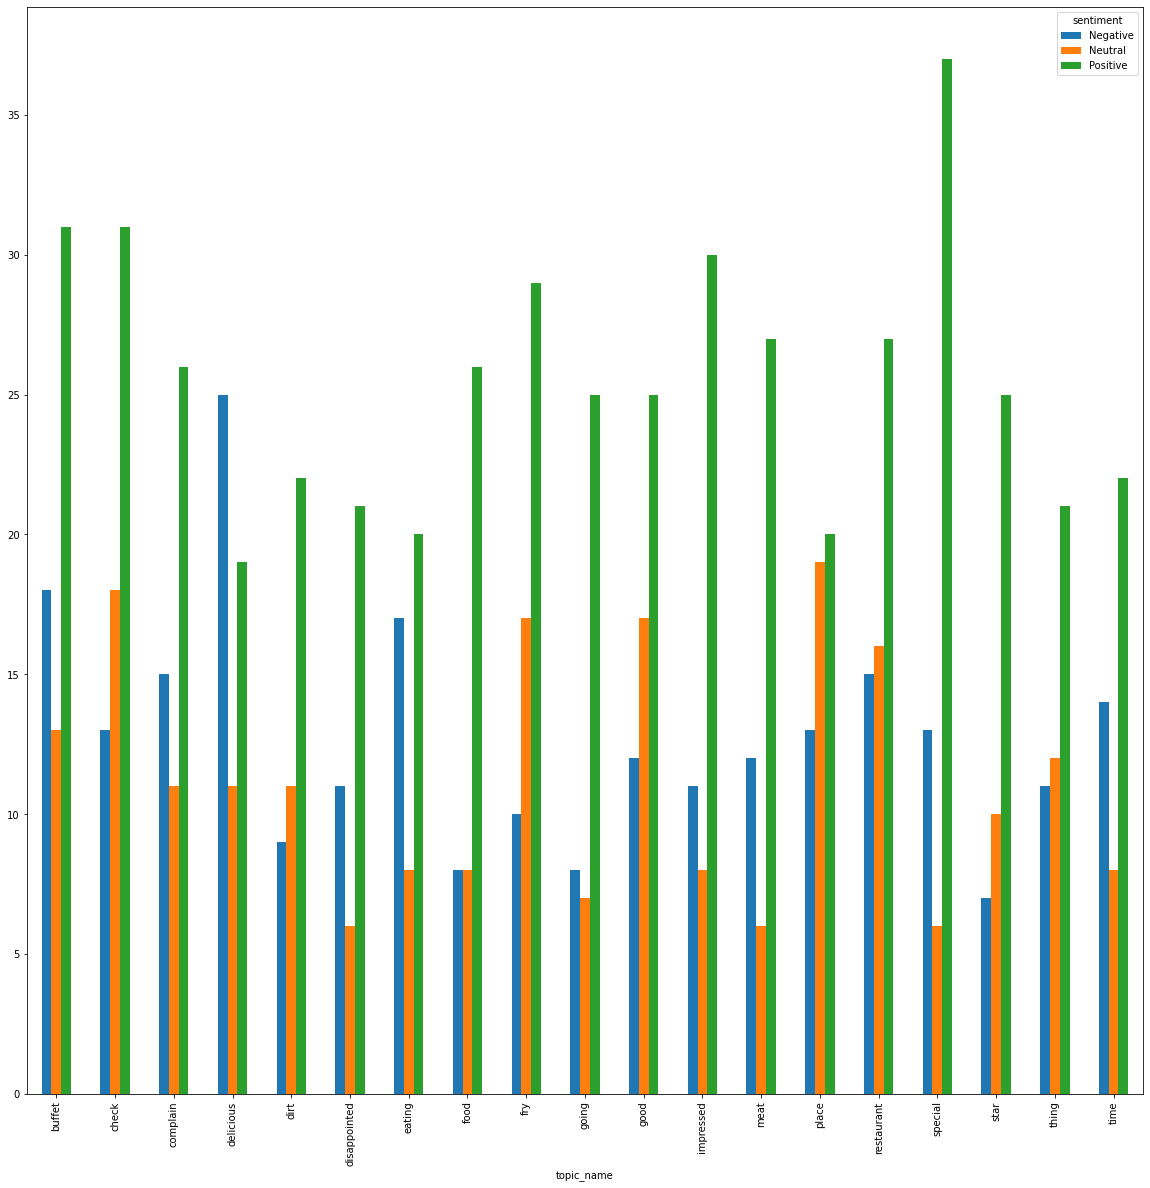

In [77]:
fig = graph_results.plot.bar(rot=90, figsize=(20,20))
fig.figure.savefig('sentiment_analysis.png', bbox_inches='tight')

#### Visualising pyLDAvis

In [78]:
tokenized_reviews=df['lemmatise']

In [79]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [80]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [81]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.041768  0.220432       1        1  8.856338
8      0.182636 -0.084045       2        1  6.849976
2      0.000565  0.095993       3        1  5.835499
3     -0.070326 -0.076152       4        1  5.456987
13     0.155796 -0.006141       5        1  5.256108
12    -0.020992 -0.135915       6        1  5.253671
0      0.013381  0.014172       7        1  5.086868
5      0.075547  0.009890       8        1  5.004430
16    -0.116518  0.038517       9        1  4.937380
19     0.001255 -0.016689      10        1  4.894887
14     0.037779 -0.028057      11        1  4.889684
11     0.007605  0.108254      12        1  4.694867
6      0.043059 -0.021054      13        1  4.693217
1     -0.078777 -0.013825      14        1  4.591917
10     0.082004  0.015183      15        1  4.492104
15    -0.063049 -0.042068      16        1  4.338892
4     -0.113733 -0.076265      17        1  4.142951
17    -0.120512 -0.049985      18        1  3.880127
9      0.044185  0.050507      19        1  3.720335
18    -0.018137 -0.002752      20        1  3.123761, topic_info=           Term       Freq      Total Category  logprob  loglift
4          good  71.000000  71.000000  Default  30.0000  30.0000
1         place  85.000000  85.000000  Default  29.0000  29.0000
62         food  93.000000  93.000000  Default  28.0000  28.0000
27         time  40.000000  40.000000  Default  27.0000  27.0000
32      service  63.000000  63.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
90         warm   0.703154   5.739616  Topic20  -5.2286   1.3666
86      running   0.703154   3.591318  Topic20  -5.2286   1.8354
84  overwhelmed   0.703154   2.167990  Topic20  -5.2286   2.3402
89      totally   0.703154   2.860859  Topic20  -5.2286   2.0628
82         hour   0.703154   6.415100  Topic20  -5.2286   1.2553

[1134 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
183       3  0.452123  absolutely
183       8  0.150708  absolutely
183      11  0.150708  absolutely
183      13  0.150708  absolutely
1113      4  0.684992  accomodate
...     ...       ...         ...
1146     16  0.695542      yellow
717       8  0.684492     yelpers
790       5  0.694695       yucky
579      17  0.693776       yukon
641      16  0.464987         yum

[1751 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 3, 4, 14, 13, 1, 6, 17, 20, 15, 12, 7, 2, 11, 16, 5, 18, 10, 19])

#### Scores

In [82]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)




Perplexity:  -6.6121996739296796

Coherence Score:  0.616685520808924


In [83]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [84]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

In [85]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " -- Coherence Value of", round(cv, 4))

Num Topics = 2  -- Coherence Value of 0.5837
Num Topics = 3  -- Coherence Value of 0.5729
Num Topics = 4  -- Coherence Value of 0.5711
Num Topics = 5  -- Coherence Value of 0.5906
Num Topics = 6  -- Coherence Value of 0.5804
Num Topics = 7  -- Coherence Value of 0.5841
Num Topics = 8  -- Coherence Value of 0.578
Num Topics = 9  -- Coherence Value of 0.5798
Num Topics = 10  -- Coherence Value of 0.5822
Num Topics = 11  -- Coherence Value of 0.5893
Num Topics = 12  -- Coherence Value of 0.604
Num Topics = 13  -- Coherence Value of 0.5993
Num Topics = 14  -- Coherence Value of 0.6124
Num Topics = 15  -- Coherence Value of 0.606
Num Topics = 16  -- Coherence Value of 0.6104
Num Topics = 17  -- Coherence Value of 0.6212
Num Topics = 18  -- Coherence Value of 0.6079
Num Topics = 19  -- Coherence Value of 0.6097
Num Topics = 20  -- Coherence Value of 0.6152
Num Topics = 21  -- Coherence Value of 0.6065
Num Topics = 22  -- Coherence Value of 0.602
Num Topics = 23  -- Coherence Value of 0.6092


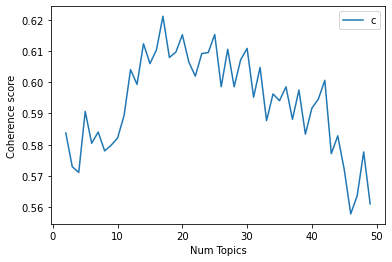

In [86]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



#### Select the model and print the topics


In [87]:
optimal_model = model_list[20]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(3,
  '0.018*"food" + 0.014*"disappointed" + 0.014*"minute" + 0.014*"good" + 0.009*"dining" + 0.009*"party" + 0.009*"selection" + 0.009*"gold" + 0.009*"feel" + 0.009*"slow"'),
 (18,
  '0.027*"food" + 0.018*"star" + 0.013*"restaurant" + 0.013*"disappointed" + 0.013*"service" + 0.009*"fresh" + 0.009*"quality" + 0.009*"ordered" + 0.009*"tasty" + 0.009*"friendly"'),
 (20,
  '0.054*"service" + 0.024*"place" + 0.020*"good" + 0.020*"star" + 0.020*"food" + 0.017*"vega" + 0.014*"time" + 0.014*"buffet" + 0.014*"price" + 0.010*"feel"'),
 (12,
  '0.017*"time" + 0.017*"experience" + 0.013*"friendly" + 0.013*"good" + 0.013*"food" + 0.013*"staff" + 0.009*"shrimp" + 0.009*"care" + 0.009*"dining" + 0.009*"ice"'),
 (8,
  '0.014*"good" + 0.012*"worst" + 0.010*"night" + 0.010*"day" + 0.010*"seated" + 0.010*"trip" + 0.010*"steak" + 0.010*"suck" + 0.010*"sashimi" + 0.010*"sick"'),
 (9,
  '0.042*"food" + 0.025*"time" + 0.014*"good" + 0.011*"minute" + 0.011*"sauce" + 0.009*"sushi" + 0.009*"server" + 0.009*"m

### Visualize the topics


In [88]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.046765  0.004357       1        1  6.352635
17    -0.047730  0.007817       2        1  6.308360
10     0.005208  0.106309       3        1  5.736077
2     -0.028372 -0.090818       4        1  5.707365
16    -0.125168  0.044886       5        1  5.670795
20    -0.069072  0.049438       6        1  5.604999
1     -0.004989  0.096697       7        1  5.096701
14    -0.080950 -0.066014       8        1  5.029683
21    -0.017758 -0.031289       9        1  4.954314
0     -0.007157  0.064553      10        1  4.511452
11     0.047988 -0.052492      11        1  4.347378
7     -0.044860  0.014097      12        1  4.170400
12     0.039686  0.102486      13        1  4.164185
13     0.178332  0.064875      14        1  3.954868
4      0.049070 -0.037063      15        1  3.903433
3      0.111934 -0.035084      16        1  3.764134
6      0.050999 -0.033499      17        1  3.757485
8      0.012803 -0.101143      18        1  3.573636
18     0.029321 -0.083199      19        1  3.531336
19    -0.043240  0.000091      20        1  3.523791
5     -0.039864 -0.014148      21        1  3.374043
15     0.030584 -0.010858      22        1  2.962928, topic_info=         Term       Freq      Total Category  logprob  loglift
1       place  82.000000  82.000000  Default  30.0000  30.0000
27       time  41.000000  41.000000  Default  29.0000  29.0000
32    service  65.000000  65.000000  Default  28.0000  28.0000
301      best  22.000000  22.000000  Default  27.0000  27.0000
255     going  13.000000  13.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
589     small   0.712778   5.051123  Topic22  -5.1622   1.5608
93      worst   0.712775  11.485522  Topic22  -5.1622   0.7393
177     enjoy   0.712775   5.154136  Topic22  -5.1622   1.5406
959     group   0.712773   2.932569  Topic22  -5.1622   2.1045
560  insulted   0.712770   2.919676  Topic22  -5.1622   2.1089

[1244 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
804      10  0.698992           5
1137      9  0.684259    absolute
183       4  0.303747  absolutely
183       5  0.151874  absolutely
183       7  0.151874  absolutely
...     ...       ...         ...
1066     20  0.716185  yellowtail
717       8  0.686667     yelpers
790       3  0.658446       yucky
579      16  0.692491       yukon
641      14  0.467666         yum

[2083 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 18, 11, 3, 17, 21, 2, 15, 22, 1, 12, 8, 13, 14, 5, 4, 7, 9, 19, 20, 6, 16])